In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.nunique ()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

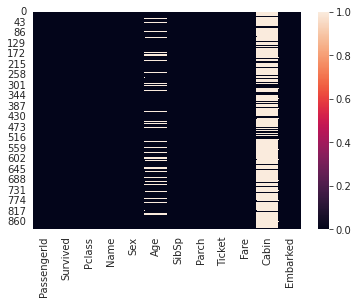

In [9]:
sns.heatmap(df.isnull())

In [10]:
display(df[['Sex','Survived']].groupby(df['Sex'],as_index=False).sum(),round(3))

,Survived
0,233
1,109


3

In [11]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [12]:
male = df.loc[df.Sex == 'male']

In [13]:
Survived_male = sum(male.Survived)
print('Total Survived male = ',Survived_male)

Total Survived male =  109


In [14]:
Per_male = sum(male.Survived)/len(male)
print('% male = ', Per_male)

% male =  0.18890814558058924


In [15]:
female = df.loc[df.Sex == 'female']

In [16]:
Survived_female = sum(female.Survived)
print('Total survived female = ', Survived_female)

Total survived female =  233


In [17]:
Per_female = sum(female.Survived)/len(female)
print('% female = ', Per_female)

% female =  0.7420382165605095


In [18]:
display(df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).sum(),round(3))

,Pclass,Survived
0,1,136
1,2,87
2,3,119


3

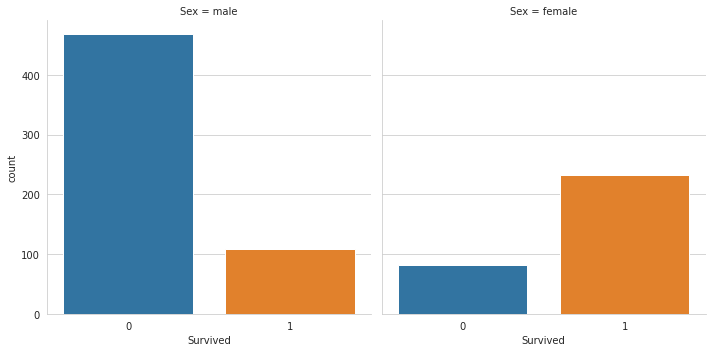

In [19]:
sns.factorplot(x='Survived',
    col='Sex',
    kind='count',
    data=df)

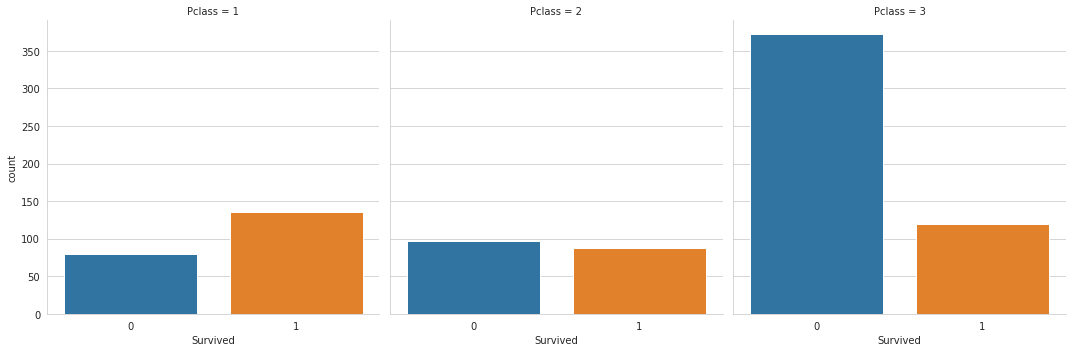

In [20]:
sns.factorplot(x='Survived',
    col='Pclass',
    kind='count',
    data=df)
plt.show()

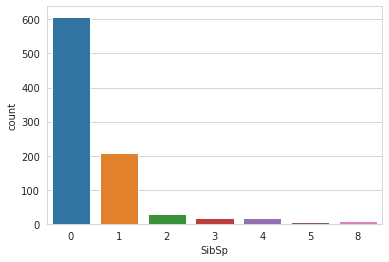

In [21]:
sns.countplot('SibSp',data=df)

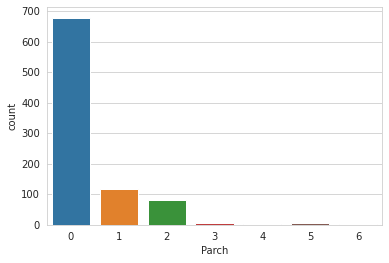

In [22]:
sns.countplot('Parch',data=df)

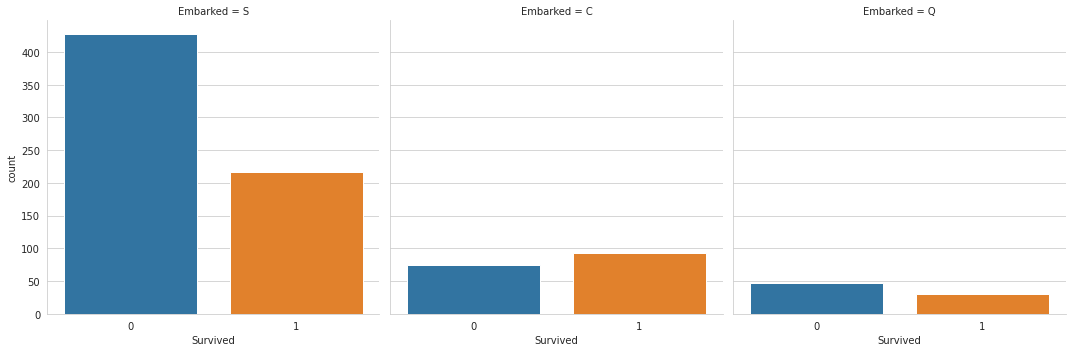

In [23]:
sns.factorplot(x='Survived',
    col='Embarked',
    kind='count',
    data=df)

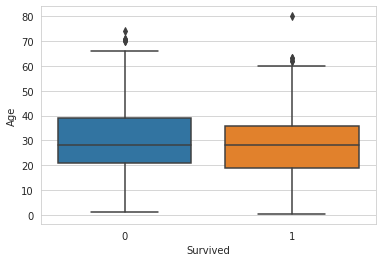

In [24]:
# Age and Survived
sns.boxplot(x='Survived',y='Age',data=df)

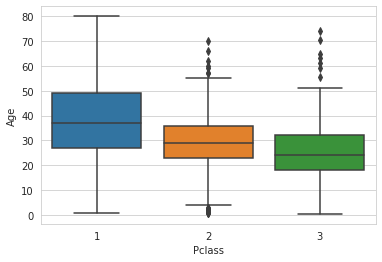

In [25]:
# Age and Pclass
sns.boxplot(x='Pclass',y='Age',data=df)

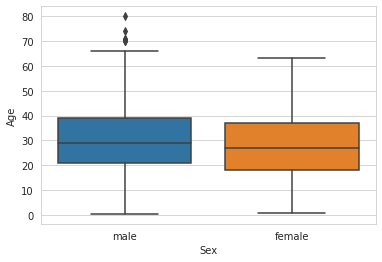

In [26]:
# Age and Sex
sns.boxplot(x='Sex',y='Age',data=df)

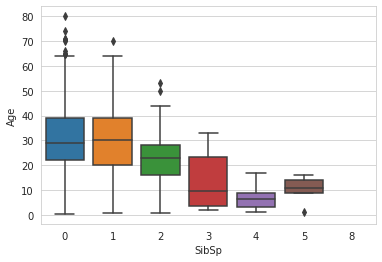

In [27]:
# SipSb and Age
sns.boxplot(x='SibSp',y='Age',data=df)

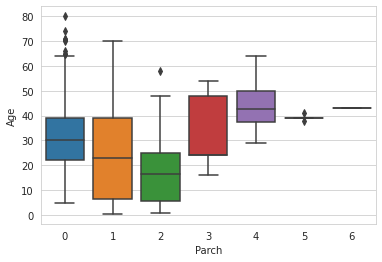

In [28]:
# Parch and Age
sns.boxplot(x='Parch',y='Age',data=df)

In [29]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [30]:
df.drop(['PassengerId','Embarked','Name','Ticket','Fare','Cabin'],axis=1,inplace=True)

In [32]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
888,0,3,female,NaN,1,2
889,1,1,male,26.0,0,0


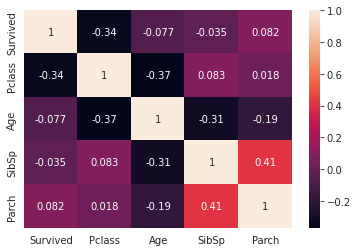

In [59]:
corr = df.corr()
sns.heatmap(corr, annot = True)

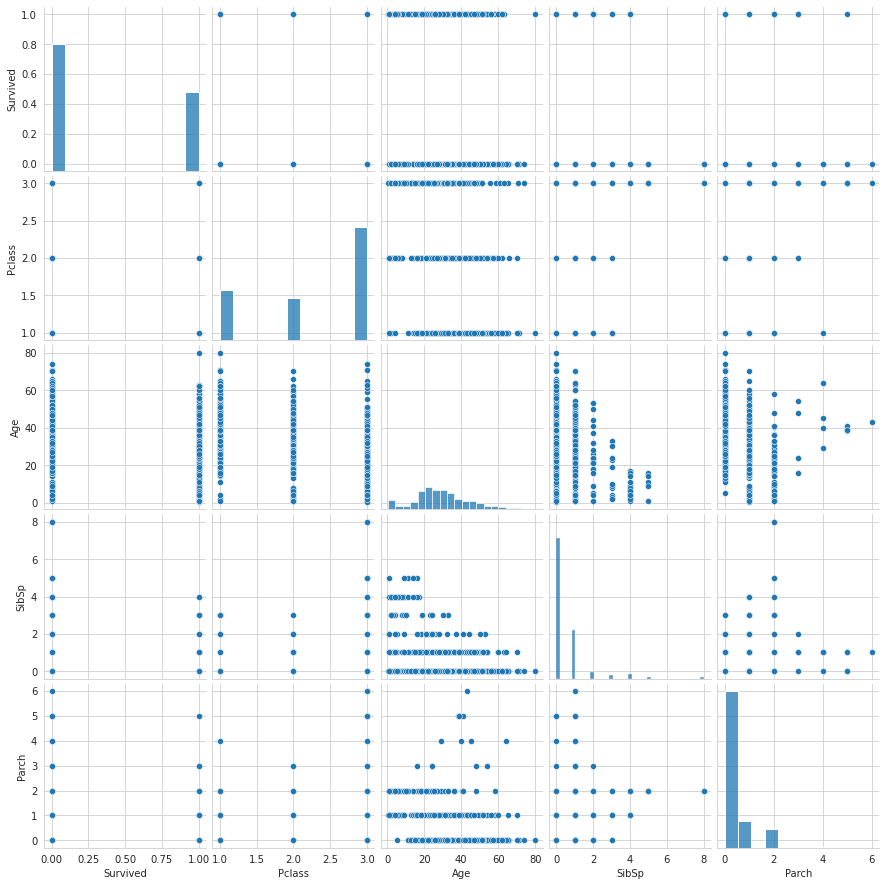

In [60]:
sns.pairplot(df)